# **Internity Final Project** - SENTIMENT ANALYSIS (Large Movie Review Data)

Dataset - http://ai.stanford.edu/~amaas/data/sentiment/

*Created By - Akshar Rastogi, Abu Qais, Amisha Gangwar*





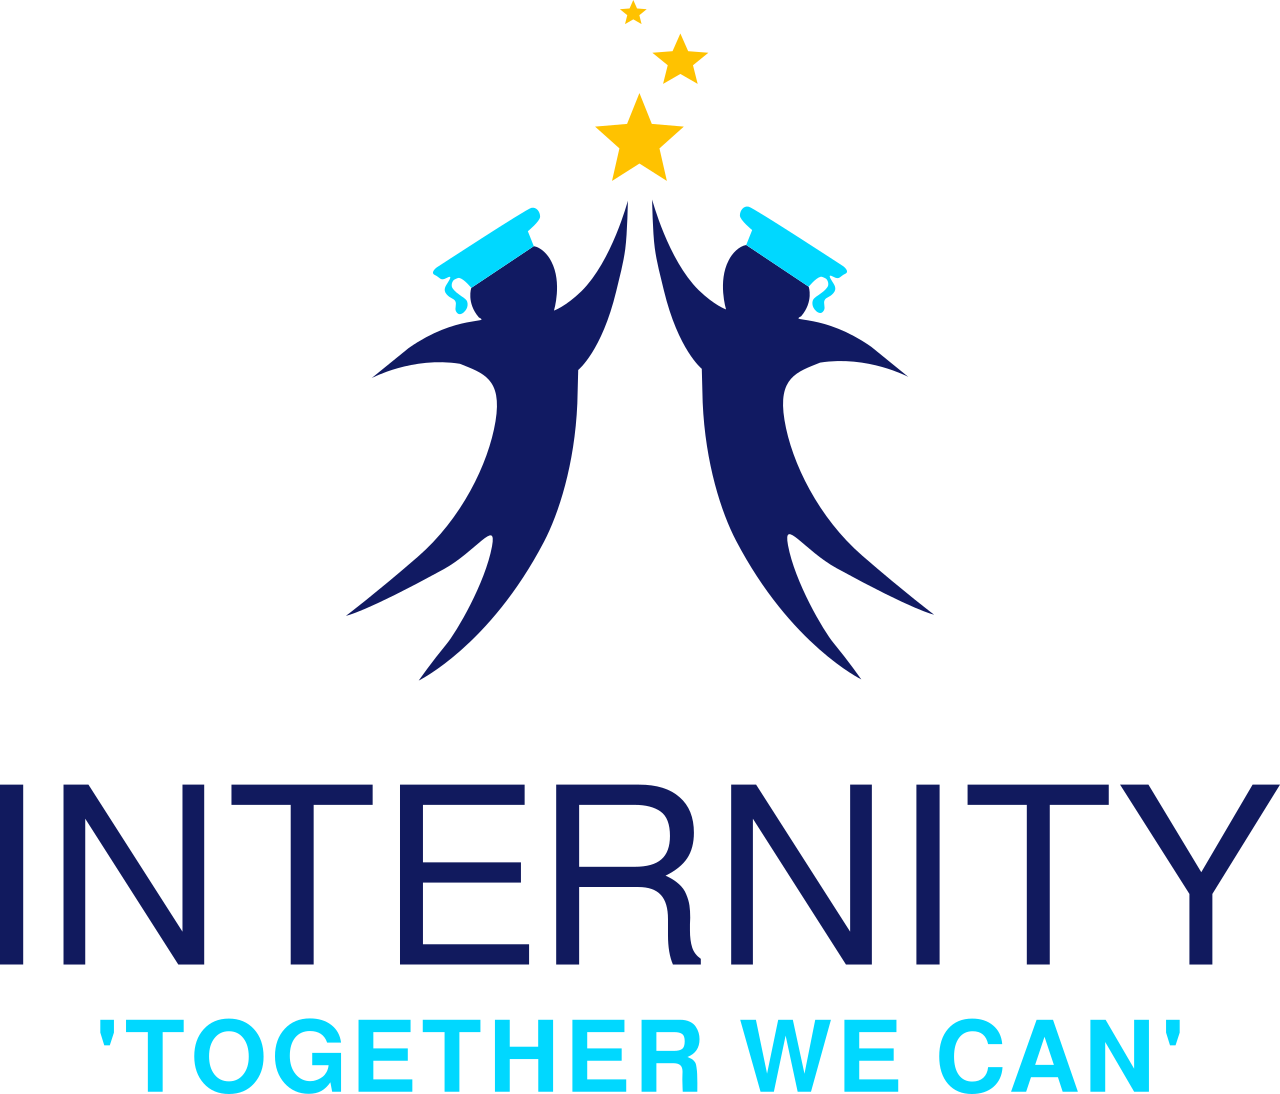




# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import plotly

# **Loading Data** 

In [5]:
df_neg = pd.read_csv('/content/drive/MyDrive/data/negativereviews.csv')
df_pos = pd.read_csv('/content/drive/MyDrive/data/positivereviews.csv')

# **Data Preprocessing**

In [6]:
df_pos['Index'] = df_pos['Index'] +12550

In [7]:
df_pos.columns

Index(['Unnamed: 0', 'Index', 'Rating', 'Label', 'Reviews'], dtype='object')

In [8]:
df_pos = df_pos.drop(columns='Unnamed: 0')

In [9]:
df_pos

,Index,Rating,Label,Reviews
0,23999,10,Positive,this has by far been one of the most beautiful...
1,24247,10,Positive,This Film was really eye-opening. I have seen ...
2,24130,10,Positive,As a another reviewer states Hanna's War is an...
3,23934,7,Positive,The dazzling seventeen-minute dance sequence o...
4,24366,8,Positive,That was great fun! I never read those Chester...
...,...,...,...,...
12515,13541,7,Positive,I really am shocked to see the number of revie...
12516,13123,9,Positive,I've always enjoyed films that depict life as ...
12517,12978,7,Positive,"Two women, sick of their controlling husbands,..."
12518,13302,7,Positive,Four teenage girls in a suburb of Los Angeles ...


In [10]:

df = pd.concat([df_neg, df_pos])

In [11]:
df

,Unnamed: 0,Index,Rating,Label,Reviews
0,0.0,11491,3,Negative,This is a fascinating film--especially to old ...
1,1.0,11665,3,Negative,"I enjoyed the movie very much, emotionally, in..."
2,2.0,11616,4,Negative,"I did not enjoy the film, Joshua, at all. Perh..."
3,3.0,11578,1,Negative,"Perhaps the biggest waste of production time, ..."
4,4.0,11301,3,Negative,Nothing will ruin a movie as much as the combi...
...,...,...,...,...,...
12515,NaN,13541,7,Positive,I really am shocked to see the number of revie...
12516,NaN,13123,9,Positive,I've always enjoyed films that depict life as ...
12517,NaN,12978,7,Positive,"Two women, sick of their controlling husbands,..."
12518,NaN,13302,7,Positive,Four teenage girls in a suburb of Los Angeles ...


In [12]:
df = df.drop(columns='Unnamed: 0')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25070 entries, 0 to 12519
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    25070 non-null  int64 
 1   Rating   25070 non-null  int64 
 2   Label    25070 non-null  object
 3   Reviews  25070 non-null  object
dtypes: int64(2), object(2)
memory usage: 979.3+ KB


In [14]:
df2 = df

In [15]:
df = df.sample(frac=1).reset_index(drop=True)

In [16]:
df

,Index,Rating,Label,Reviews
0,9000,2,Negative,"When I rented this I was hoping for what ""Reig..."
1,17898,8,Positive,Another Excellent Arnold movie. This futuristi...
2,11409,1,Negative,Really started the 80s trend of disgusting vio...
3,2116,4,Negative,The Poverty Row horror pictures of the 1930s a...
4,14541,10,Positive,"Yes, as unbelievable as it may be, in 1968 a m..."
...,...,...,...,...
25065,11385,2,Negative,"Before I start, let me say that my experience ..."
25066,21372,10,Positive,Splendid film that in just eight minutes displ...
25067,18738,9,Positive,A Murder investigation goes on back stage whil...
25068,2380,1,Negative,"When it comes to movies, I am generally easily..."


In [17]:
df.groupby("Label")["Label"].count()

Label
Negative    12550
Positive    12520
Name: Label, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25070 entries, 0 to 25069
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    25070 non-null  int64 
 1   Rating   25070 non-null  int64 
 2   Label    25070 non-null  object
 3   Reviews  25070 non-null  object
dtypes: int64(2), object(2)
memory usage: 783.6+ KB


In [19]:
df.describe()

,Index,Rating
count,25070.000000,25070.000000
mean,12519.668608,5.473714
std,7233.090192,3.466911
min,0.000000,1.000000
25%,6253.250000,2.000000
50%,12484.500000,4.000000
75%,18781.750000,9.000000
max,25049.000000,10.000000


In [23]:
aclimdb = df

# **Rating vs Label**

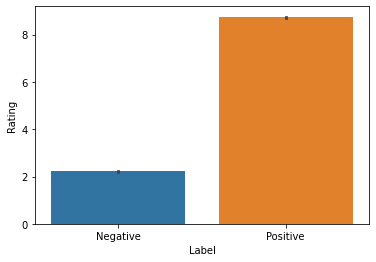

In [20]:
sns.barplot(y=df['Rating'], x=df['Label'])

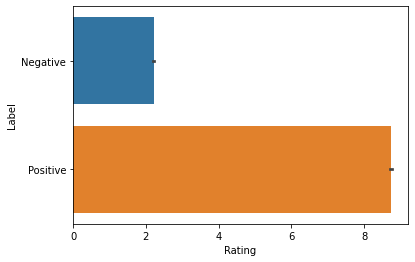

In [21]:
sns.barplot(x=df['Rating'], y=df['Label'])

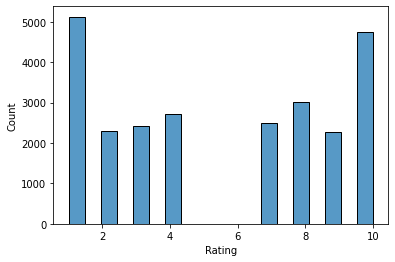

In [24]:
sns.histplot(aclimdb['Rating'])

In [25]:
aclimdb['Label'].describe()

count        25070
unique           2
top       Negative
freq         12550
Name: Label, dtype: object

In [26]:
aclimdb['Label'].value_counts()

Negative    12550
Positive    12520
Name: Label, dtype: int64

In [27]:
aclimdb.shape

(25070, 4)

In [28]:
a =25070/4
print(3*a-2.5)

18800.0


In [29]:
aclimdb

,Index,Rating,Label,Reviews
0,9000,2,Negative,"When I rented this I was hoping for what ""Reig..."
1,17898,8,Positive,Another Excellent Arnold movie. This futuristi...
2,11409,1,Negative,Really started the 80s trend of disgusting vio...
3,2116,4,Negative,The Poverty Row horror pictures of the 1930s a...
4,14541,10,Positive,"Yes, as unbelievable as it may be, in 1968 a m..."
...,...,...,...,...
25065,11385,2,Negative,"Before I start, let me say that my experience ..."
25066,21372,10,Positive,Splendid film that in just eight minutes displ...
25067,18738,9,Positive,A Murder investigation goes on back stage whil...
25068,2380,1,Negative,"When it comes to movies, I am generally easily..."


In [30]:
X= aclimdb['Reviews']
y = aclimdb['Label']

# **Splitting Dataset into Training and Test sets**

In [31]:
(train_reviews, test_reviews, train_sentiments, test_sentiments) = train_test_split(X, y , random_state=1)

In [32]:
train_reviews.shape

(18802,)

In [33]:
train_reviews = train_reviews.sample(frac=1).reset_index(drop=True)

In [34]:
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(18802,) (18802,)
(6268,) (6268,)


# **More Data Preprocessing**

1.   Text Normalization reducing the randomness of text hence increasing the efficiency.
2.  Removing html strips and noise text.
3.  Removing the special charecters (they also generate noise in our data).
4. TEXT STEMMING
5. Removing the stopwords





# **Text Normalization reducing the randomness of text hence increasing the efficiency.**

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [37]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# **Removing html strips and noise text**



In [38]:
#removing html strips
def remove_html(txt):
  soup = BeautifulSoup(txt, 'html.parser')
  return soup.get_text()

#removing the square brackets
def remove_square_brackets(txt):
  return re.sub('\[[^]]*\]', '', txt)  

#remove noisy text
def denoise(txt):
  txt = remove_html(txt)
  txt = remove_square_brackets(txt)
  return txt  

#X= aclimdb['Review]
X = X.apply(denoise)
X_denoise = X

In [39]:
X

0        When I rented this I was hoping for what "Reig...
1        Another Excellent Arnold movie. This futuristi...
2        Really started the 80s trend of disgusting vio...
3        The Poverty Row horror pictures of the 1930s a...
4        Yes, as unbelievable as it may be, in 1968 a m...
                               ...                        
25065    Before I start, let me say that my experience ...
25066    Splendid film that in just eight minutes displ...
25067    A Murder investigation goes on back stage whil...
25068    When it comes to movies, I am generally easily...
25069    This movie was extremely boring. It should lea...
Name: Reviews, Length: 25070, dtype: object

# **Removing the special charecters (they also generate noise in our data).**

In [40]:
def remove_special_charecters(txt, remove_digits=True):
  pattern =r'[^a-zA-z0-9\s]'
  txt = re.sub(pattern, '', txt)
  return txt

X = X.apply(remove_special_charecters)  
X_remove_special_charecters = X

In [41]:
X

0        When I rented this I was hoping for what Reign...
1        Another Excellent Arnold movie This futuristic...
2        Really started the 80s trend of disgusting vio...
3        The Poverty Row horror pictures of the 1930s a...
4        Yes as unbelievable as it may be in 1968 a mus...
                               ...                        
25065    Before I start let me say that my experience o...
25066    Splendid film that in just eight minutes displ...
25067    A Murder investigation goes on back stage whil...
25068    When it comes to movies I am generally easily ...
25069    This movie was extremely boring It should leas...
Name: Reviews, Length: 25070, dtype: object

# **TEXT STEMMING** - in which the prefix and suffix are sliced out from a word. 

In [42]:
def text_stemmer(txt):
  ps = nltk.PorterStemmer()
  txt = ''.join([ps.stem(word) for word in txt.split()])
  return txt
  X = X.apply(text_stemmer)
  X_text_stemmer = X

In [43]:
X

0        When I rented this I was hoping for what Reign...
1        Another Excellent Arnold movie This futuristic...
2        Really started the 80s trend of disgusting vio...
3        The Poverty Row horror pictures of the 1930s a...
4        Yes as unbelievable as it may be in 1968 a mus...
                               ...                        
25065    Before I start let me say that my experience o...
25066    Splendid film that in just eight minutes displ...
25067    A Murder investigation goes on back stage whil...
25068    When it comes to movies I am generally easily ...
25069    This movie was extremely boring It should leas...
Name: Reviews, Length: 25070, dtype: object

# **Removing the stopwords**

In [44]:
stop = set(stopwords.words('english'))
print(stop)

{'all', "that'll", 'a', 'each', 'before', "doesn't", 'most', 'off', 'hadn', "shouldn't", "needn't", 'now', "you'd", 'has', "wouldn't", 'is', 'as', 'themselves', 'are', 'ours', 'in', 'theirs', 'her', 'it', 'did', 'hasn', 'hers', 'had', 'am', 'was', 'having', 'by', 'he', 'on', "wasn't", 'nor', 'at', 'don', 'here', "couldn't", 'his', 'too', 'haven', 'that', 'above', 'ma', 'these', 've', 'so', 'wouldn', 'very', 'with', 'my', 'but', "didn't", 'i', "you've", 'can', 'them', "she's", 'after', 'your', 'or', 'she', 'its', 'under', 'yours', 'only', 'just', 'about', 'of', 'such', 'will', 'd', 'wasn', 'herself', 'didn', 'be', 'yourselves', "it's", 'there', 'ourselves', "you'll", "weren't", 'me', 'should', 'does', "should've", 'o', 'when', 'shan', 'to', 'some', 'what', 'm', "mustn't", 't', 'other', 'again', 'itself', 'you', 'down', 're', 'needn', 'same', 'shouldn', 'weren', "mightn't", 'himself', 'have', 'than', 'whom', "you're", 'where', 'aren', "won't", "haven't", 'further', 'no', 'y', 'for', 'mys

In [45]:
def stopwords(txt , is_lower_case=False):
  tokens = tokenizer.tokenize(txt)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
  return filtered_text
#Apply function on review columnX
X = X.apply(stopwords)
X_stopwords = X

In [46]:
X

0        rented hoping Reign Fire deliver clash modern ...
1        Another Excellent Arnold movie futuristic movi...
2        Really started 80s trend disgusting violence m...
3        Poverty Row horror pictures 1930s 40s depress ...
4        Yes unbelievable may 1968 musical Academy Awar...
                               ...                        
25065    start let say experience movie might influence...
25066    Splendid film eight minutes displays unusual g...
25067    Murder investigation goes back stage Vanities ...
25068    comes movies generally easily entertained crit...
25069    movie extremely boring least 15 minutes images...
Name: Reviews, Length: 25070, dtype: object

In [47]:
test_reviews

4502     Not funny - how can anyone link this to Monty ...
9371     Satan's Little Helper is one of the better B H...
13245    The Fiendish Plot of Dr. Fu Manchu starring Pe...
20851    _Waterdance_ explores a wide variety of aspect...
22575    I never actually thought that a film could be ...
                               ...                        
13876    Paul Verhoeven's predecessor to his breakout h...
6103     This movie is about as underrated as Police Ac...
1416     I'm not saying that because the production val...
21668    I have NOT seen this movie, but I must. Having...
536      FLIGHT OF FURY takes the mantle of being the v...
Name: Reviews, Length: 6268, dtype: object

# **Normalized Train reviews**

In [48]:
norm_train_reviews = X[:18802]
norm_train_reviews[0]

'rented hoping Reign Fire deliver clash modern technology mythic beastsInstead got standard monster hunts stupid people remote building flick bad script bad music bad effects bad plot bad acting Bad bad badOnly reason give 2 theory could exist worse movies theory'

In [49]:
train_reviews

0        (Sorry for my faulty language, i am no native ...
1        This film is notable for three reasons.<br /><...
2        This was one of the lamest movies we watched i...
3        I'm not saying that just as a Chris Rock fan, ...
4        This was by far the worst low budget horror mo...
                               ...                        
18797    'Succubus', the edited version of 'Necronomico...
18798    Don't waste time reading my review. Go out and...
18799    Can it ever be said that there are some movies...
18800    This sounded like a really interesting movie f...
18801    Note: I couldn't force myself to actually writ...
Name: Reviews, Length: 18802, dtype: object

In [50]:
#Normalized test reviews
norm_test_reviews = X[18802:]
norm_test_reviews

18802    Bette Davis turns coldly amusing performance M...
18803    Kudos writers film creating supremely engaging...
18804    cant believe likes Guillermo del Toro Kim Bass...
18805    far understand TIW WATCHER first work young di...
18806    case liked movie saw found expected mean one a...
                               ...                        
25065    start let say experience movie might influence...
25066    Splendid film eight minutes displays unusual g...
25067    Murder investigation goes back stage Vanities ...
25068    comes movies generally easily entertained crit...
25069    movie extremely boring least 15 minutes images...
Name: Reviews, Length: 6268, dtype: object

# **Bags of worlds model convert text to numeric vectors**


In [51]:
#countvectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))
#transformed train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews = cv.transform(norm_test_reviews)

print(cv_train_reviews.shape)
print(cv_test_reviews.shape)

(18802, 3410150)
(6268, 3410150)


# **Term Frequency-Inverse Document Frequency model (TFIDF)**
It is used to convert text documents to matrix of tfidf features.

In [52]:
#tfidf vectorizer
tv = TfidfVectorizer(min_df =0, max_df=1, use_idf= True, ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print(tv_train_reviews)
print(tv_test_reviews)

  (0, 3354218)	0.1386750490563073
  (0, 974447)	0.1386750490563073
  (0, 623303)	0.1386750490563073
  (0, 2987714)	0.1386750490563073
  (0, 1243032)	0.1386750490563073
  (0, 2427538)	0.1386750490563073
  (0, 253130)	0.1386750490563073
  (0, 245717)	0.1386750490563073
  (0, 245670)	0.1386750490563073
  (0, 48767)	0.1386750490563073
  (0, 2004571)	0.1386750490563073
  (0, 2595933)	0.1386750490563073
  (0, 1131549)	0.1386750490563073
  (0, 396476)	0.1386750490563073
  (0, 2463050)	0.1386750490563073
  (0, 2210827)	0.1386750490563073
  (0, 2884477)	0.1386750490563073
  (0, 1446963)	0.1386750490563073
  (0, 1932314)	0.1386750490563073
  (0, 2816916)	0.1386750490563073
  (0, 1286005)	0.1386750490563073
  (0, 272984)	0.1386750490563073
  (0, 2015235)	0.1386750490563073
  (0, 2959411)	0.1386750490563073
  (0, 1922530)	0.1386750490563073
  :	:
  (18801, 1028793)	0.059654998627189364
  (18801, 119416)	0.059654998627189364
  (18801, 2932927)	0.059654998627189364
  (18801, 721671)	0.05965499862718

# **Labeling the sentiment data**

In [53]:
lb = LabelBinarizer()
#transformed sentiment data
sentiment_data = lb.fit_transform(y)
#transformed sentiment data
print(sentiment_data)
print(sentiment_data.shape)

[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]
(25070, 1)


In [54]:
#splitting sentiment data
train_sentiments = sentiment_data[:18802]
test_sentiments = sentiment_data[18802:]

In [55]:
print(train_sentiments)
print(test_sentiments)

print(train_sentiments.shape)
print(test_sentiments.shape)

[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]
(18802, 1)
(6268, 1)


# **Using Multinomial Naive Bayes**

In [56]:
print('We are using Multinomial Naive Bayes')

mnb = MultinomialNB()
mnb_bag_of_words = mnb.fit(cv_train_reviews, train_sentiments)
#fitting for bag of words
print(mnb_bag_of_words)

We are using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [57]:
#fitting for tfidf features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


# **Prediction**

In [58]:
mnb_bag_of_words_predict = mnb.predict(cv_test_reviews)
mnb_tfidf_predict = mnb.predict(tv_test_reviews)

# **Accuracy scores**

In [59]:
#accuracy scores

mnb_bag_of_words_score = accuracy_score(test_sentiments, mnb_bag_of_words_predict)
mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print('mnb_bag_of_words_score:', mnb_bag_of_words_score)
print('mnb_tfidf_score:', mnb_tfidf_score)

mnb_bag_of_words_score: 0.7501595405232929
mnb_tfidf_score: 0.7469687300574346


In [60]:
Test_sentiments = test_sentiments.reshape(6268, order='C')

# **Plotting the prediction results**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


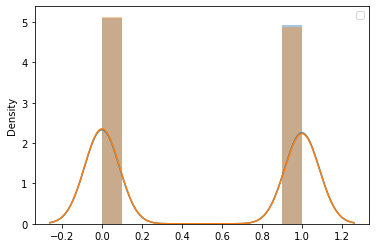

In [61]:
sns.distplot([Test_sentiments])
sns.distplot([mnb_bag_of_words_predict])
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



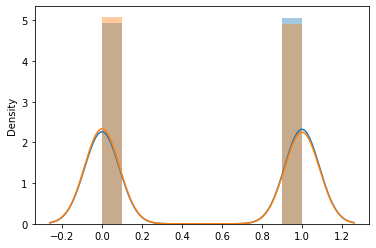

In [62]:
#sns.countplot([mnb_bag_of_words_predict])
sns.distplot([mnb_tfidf_predict], label='Predicted')
sns.distplot([Test_sentiments], label='True')

In [64]:
test_sentiments

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [65]:
mnb_bag_of_words_predict.shape

(6268,)

In [66]:
b.shape = (6268,)

In [67]:
b = np.reshape(b,(6268,), order='F')

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [90]:
ts = test_sentiments

In [92]:
ts =np.reshape(ts, (6268,), order='F')

In [96]:
mnb_bow_pred = mnb_bag_of_words_predict

In [98]:
mnb_bow_pred = mnb_bow_pred.tolist()

In [100]:
print(mnb_bow_pred)

[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 

In [95]:
ts= ts.tolist()

In [105]:
conf_matrix = confusion_matrix(ts, mnb_bow_pred)

In [75]:
print(classification_report(test_sentiments, mnb_bag_of_words_predict))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      3189
           1       0.75      0.74      0.74      3079

    accuracy                           0.75      6268
   macro avg       0.75      0.75      0.75      6268
weighted avg       0.75      0.75      0.75      6268



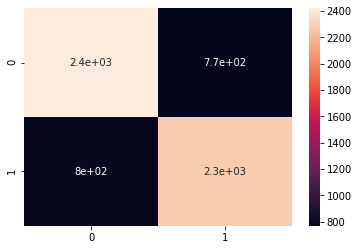

In [107]:
sns.heatmap(conf_matrix, annot=True)

In [113]:
class_report = pd.DataFrame(classification_report(test_sentiments, mnb_bag_of_words_predict, output_dict=True))

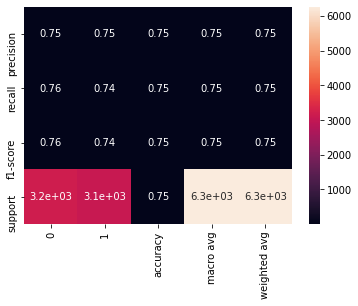

In [118]:
sns.heatmap(class_report, annot=True, label='Classification Report')